In [35]:
import numpy as np
import matplotlib.pyplot as plt
import plot_fits
import plot_vis
import glob
from pyuvdata import UVData, UVFlag
import warnings
import os
os.environ['HDF5_USE_FILE_LOCKING'] = 'FALSE'
import h5py
import hdf5plugin
warnings.filterwarnings('ignore')
%matplotlib inline

In [34]:
raw_data = '/lustre/aoc/projects/hera/dstorer/Projects/updatedHeraOnFHD/2459673/uvfitsFiles/zen.2459673.25275.sum.u_mid_20Obs.uvfits'
fhd_path = '/lustre/aoc/projects/hera/dstorer/Projects/updatedHeraOnFHD/2459673/fhdOutput/fhd_2459673.2526917495_antennaNameBranch_twentyObs_mid'
dirty_files = sorted(glob.glob(f'{fhd_path}/output_data/*Dirty_XX.fits'))
beam_files = f'{fhd_path}/output_data/zen.2459673.25275.sum.u_mid_20Obs_mid_Beam_XX.fits'
model_files = f'{fhd_path}/output_data/zen.2459673.25275.sum.u_mid_20Obs_uniform_Model_XX.fits'
sources_files = f'{fhd_path}/output_data/zen.2459673.25275.sum.u_mid_20Obs_uniform_Sources_XX.fits'
flag_path = '/lustre/aoc/projects/hera/dstorer/Projects/updatedHeraOnFHD/2459673/ssinsFlagged'


# plot visibilities

In [4]:
obs = 'zen.2459673.25275.sum.u_mid_20Obs'
fhd_files = []
fhd_files.append(fhd_path + '/metadata/' + obs + '_params.sav')
fhd_files.append(fhd_path + '/metadata/' + obs + '_settings.txt')
fhd_files.append(fhd_path + '/metadata/' + obs + '_layout.sav')
vis_files = ['flags.sav','vis_XX.sav','vis_YY.sav','vis_model_XX.sav','vis_model_YY.sav']
for f in vis_files:
    fhd_files.append(fhd_path + '/vis_data/' + obs + '_' + f)
calData = UVData()
calData.read(fhd_files,use_model=False)
model = UVData()
model.read(fhd_files,use_model=True)
raw = UVData()
raw.read(raw_data)

In [36]:
raw.time_array

array([2459673.25269175, 2459673.25269175, 2459673.25269175, ...,
       2459673.25481686, 2459673.25481686, 2459673.25481686])

In [47]:
flags = UVFlag()
flag_files = sorted(glob.glob(f'{flag_path}/*flags.h5'))
flags.read(flag_files[0])
flags = flags.flag_array[:,845:1090,0]

In [53]:
flags

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

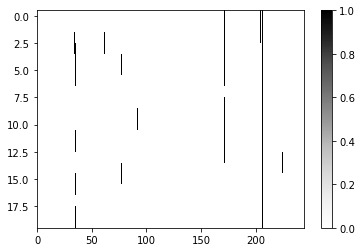

In [55]:
fig = plt.figure()
im = plt.imshow(flags,aspect='auto',cmap='Greys',interpolation='nearest')
plt.colorbar(im)

In [72]:
def plot_vis(raw,calData,model,bl):
    figsize = (12,12)

    fig, ax = plt.subplots(3,2,figsize=figsize)
    im = ax[0][0].imshow(np.ma.masked_where(flags,np.abs(raw.get_data(bl))),aspect='auto',extent=[150,180,20,0],interpolation='nearest')
    ax[0][0].set_title('Raw Vis Abs')
    im = ax[0][1].imshow(np.ma.masked_where(flags,np.angle(raw.get_data(bl))),aspect='auto',extent=[150,180,20,0],cmap='twilight',vmin=-np.pi,vmax=np.pi,interpolation='nearest')
    ax[0][1].set_title('Raw Vis Phase')
    # plt.colorbar(im,cax=ax[0][0])

    # fig = plt.figure(figsize=figsize)
    im = ax[1][0].imshow(np.ma.masked_where(flags,np.abs(calData.get_data(bl))),aspect='auto',extent=[150,180,20,0],interpolation='nearest')
    ax[1][0].set_title('Calibrated Vis Abs')
    im = ax[1][1].imshow(np.ma.masked_where(flags,np.angle(calData.get_data(bl))),aspect='auto',extent=[150,180,20,0],cmap='twilight',vmin=-np.pi,vmax=np.pi,interpolation='nearest')
    ax[1][1].set_title('Calibrated Vis Phase')
    # plt.colorbar(im,cax=ax[1][0])

    # fig = plt.figure(figsize=figsize)
    im = ax[2][0].imshow(np.ma.masked_where(flags,np.abs(model.get_data(bl))),aspect='auto',extent=[150,180,20,0],interpolation='nearest')
    ax[2][0].set_title('Model Vis Abs')
    im = ax[2][1].imshow(np.ma.masked_where(flags,np.angle(model.get_data(bl))),aspect='auto',extent=[150,180,20,0],cmap='twilight',vmin=-np.pi,vmax=np.pi,interpolation='nearest')
    ax[2][1].set_title('Model Vis Phase')
    # plt.colorbar(im,cax=ax[2][0])

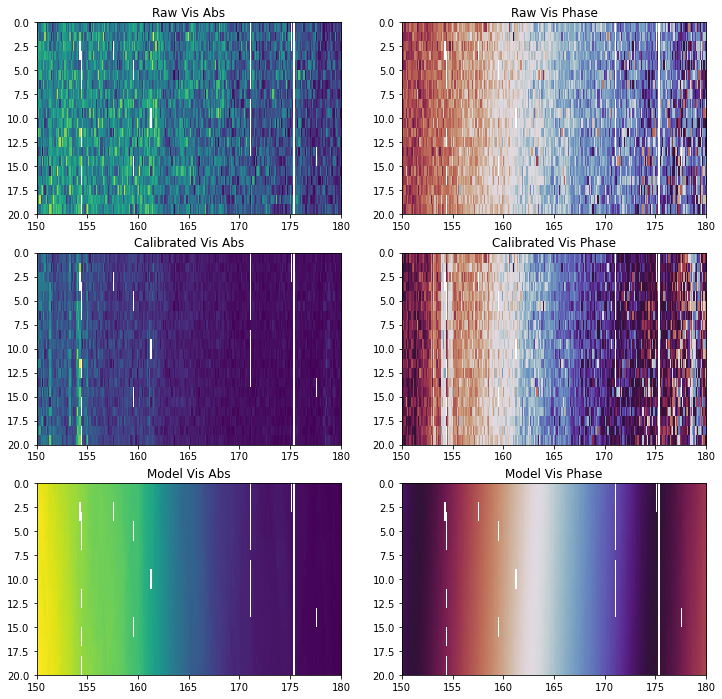

In [73]:
bl = (36,163,'XX')
plot_vis(raw,calData,model,bl)

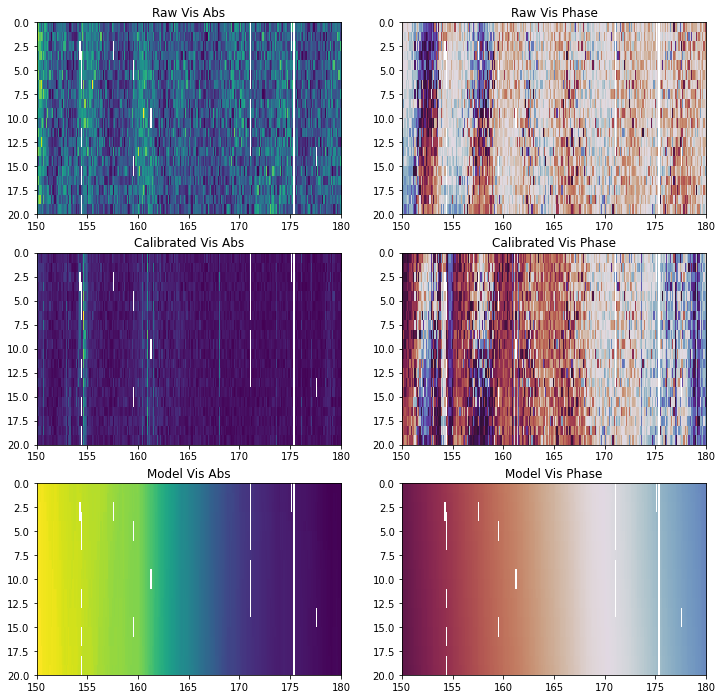

In [74]:
bl = (15,19,'XX')
plot_vis(raw,calData,model,bl)

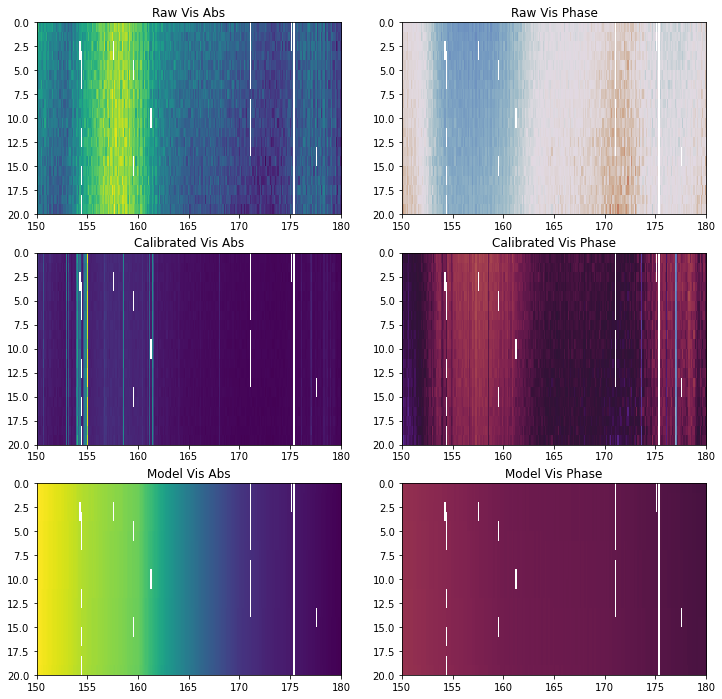

In [75]:
bl = (165,164,'XX')
plot_vis(raw,calData,model,bl)

# plot images

In [9]:
import importlib
importlib.reload(plot_fits)

<module 'plot_fits' from '/lustre/aoc/projects/hera/dstorer/Projects/updatedHeraOnFHD/plotScripts/plot_fits.py'>

-10094.825
42514.934
-9107.07
29060.848


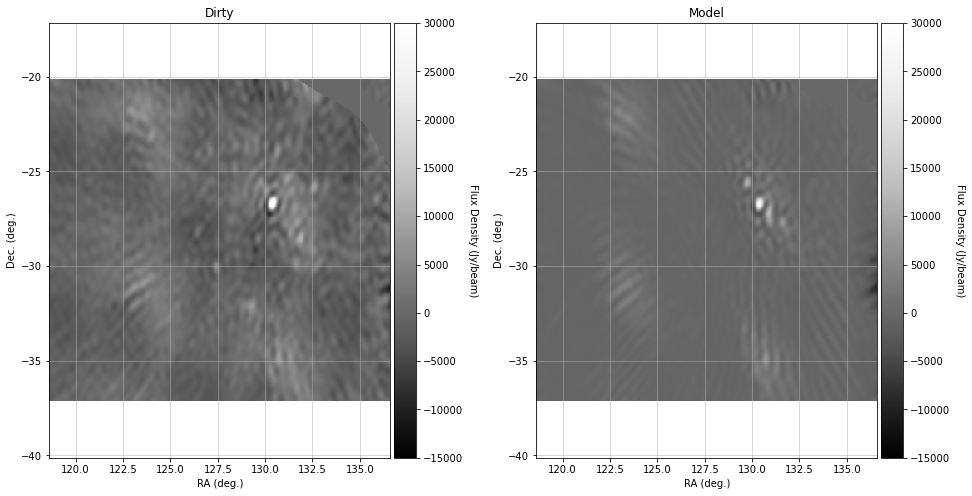

In [17]:
uv = UVData()
uv.read(raw_data)

pos = [uv.phase_center_ra_degrees,uv.phase_center_dec_degrees]
ra_range = [pos[0]-6,pos[0]+12]
dec_range = [pos[1]-6.5,pos[1]+10.5]
prefix = f'{fhd_path}/output_data'
# color_scale=[-1763758,1972024]
color_scale=[-15000,30000]
output_path = ''
write_pixel_coordinates=False
log_scale=False

data = plot_fits.load_image(dirty_files[0])
fig, ax = plt.subplots(1,2,figsize=(16,8))
im = plot_fits.plot_fits_image(data, ax[0], color_scale, output_path, prefix, write_pixel_coordinates, log_scale,
                               ra_range=ra_range,dec_range=dec_range,title='Dirty')

data = plot_fits.load_image(model_files)
im = plot_fits.plot_fits_image(data, ax[1], color_scale, output_path, prefix, write_pixel_coordinates, log_scale,
                               ra_range=ra_range,dec_range=dec_range,title='Model')

# data = plot_fits.load_image(sources_files)
# im = plot_fits.plot_fits_image(data, ax[1][0], color_scale, output_path, prefix, write_pixel_coordinates, log_scale,
#                                ra_range=ra_range,dec_range=dec_range,title='Sources')


In [ ]:
def make_frames_with_vis(fhd_path,uvfits_path,outdir,dirty_vis,model_vis,gains,raw_vis,flags,lsts,
                         pol='XX',savefig=False,ant=99,lst_mask=False,jd=2459855):
    dirty_files = sorted(glob.glob(f'{fhd_path}/fhd_*/output_data/*Dirty_{pol}.fits'))
    model_files = sorted(glob.glob(f'{fhd_path}/fhd_*/output_data/*Model_{pol}.fits'))
    residual_files = sorted(glob.glob(f'{fhd_path}/fhd_*/output_data/*Residual_{pol}.fits'))
    beam_files = sorted(glob.glob(f'{fhd_path}/fhd_*/output_data/*Beam_{pol}.fits'))
    source_files = sorted(glob.glob(f'{fhd_path}/fhd_*/output_data/*Sources_{pol}.fits'))
#     uvfits_files = sorted(glob.glob(f'{uvfits_path}/*.uvfits'))
    
#     lst_blacklists = "0-1.3 2.5-4.3 6.5-9.1 10.6-11.5 11.9-14.3 16.3-1.3"
    lst_blacklists = [(0,1.3),(2.5,4.3),(6.5,9.1),(10.6,11.5),(11.9,14.3),(16.3,24)]
    
    if lst_mask:
        alpha_mask = np.ones(np.shape(raw_vis))
        for l,lst in enumerate(np.multiply(lsts,3.819719)):
            mask = False
            for r in lst_blacklists:
    #             print(r)
                if r[0]<=lst<=r[1]:
    #                 print(f'LST {lst} in range {r}')
                    mask = True
            if mask == True:
                alpha_mask[l,:] = np.ones((1,np.shape(raw_vis)[1]),dtype=float)*0.4
            else:
                alpha_mask[l,:] = np.ones((1,np.shape(raw_vis)[1]),dtype=float)
    else:
        alpha_mask = 1
            
    
    print(f'Creating images for {len(dirty_files)} files')
#     for ind in range(0,len(dirty_files)):
    for ind in range(10,11):
        if ind%20==0:
            print(str(ind).zfill(3))
        uv = UVData()
        uv.read(uvfits_path)
        freqs = uv.freq_array[0]*1e-6
        pos = [uv.phase_center_app_ra*57.2958,-31]
        dec_range = [pos[1]-4.5,pos[1]+4.5]
        ra_range=9
#         print(f'Pos: {pos}')
#         ra_range = [pos[0]-6,pos[0]+7.8]
# #         ra_range = np.subtract(ra_range,360)
# #         print(ra_range)
#         if ra_range[0] > 180:
#             ra_range[0] = ra_range[0]-360
#         if ra_range[1] > 180:
#             ra_range[1] = ra_range[1]-360
# #         ra_range=None

#         dec_range = [pos[1]-6.5,pos[1]+6.5]
# #         dec_range=None
# #         print('dec_range')
# #         print(dec_range)
        prefix = f'{fhd_path}/output_data'
        color_scale=[-1763758,1972024]
        output_path = ''
        write_pixel_coordinates=False
        log_scale=False
        hline_frac = (ind/len(dirty_files))

        fig = plt.figure(figsize=(20,20))
        fig.tight_layout(rect=(0, 0, 1, 0.95))
        gs = fig.add_gridspec(5, 3,wspace=0.2,hspace=0.3)
        #Beam
        beam = plot_fits.load_image(beam_files[ind])
        ax = fig.add_subplot(gs[0, 0])
        im = plot_fits.plot_fits_image(beam, ax, [0,1], output_path, prefix, write_pixel_coordinates, log_scale,
                                 ra_range=ra_range,dec_range=dec_range,title='Beam')
#         #raw visibilities
#         ax = fig.add_subplot(gs[0,1:])
# #         raw_dat = np.ma.masked_where(flags[:,0,:,0]==True,np.abs(raw_vis))
#         raw_dat = np.abs(raw_vis)
#         im = plot_vis.plot_raw_vis(raw_dat,ax,ant,lsts,freqs,alpha_mask=alpha_mask)
#         ax.axhline(hline_frac*len(raw_vis),color='c')
        
        #dirty image
        data = plot_fits.load_image(dirty_files[ind])
        ax = fig.add_subplot(gs[1, 0])
#         print(ax)
        im = plot_fits.plot_fits_image(data, ax, color_scale, output_path, prefix, write_pixel_coordinates, log_scale,
                                 ra_range=ra_range,dec_range=dec_range,title='Dirty')
        #dirty vis
#         ax = fig.add_subplot(gs[1, 1:])
#         im = plot_vis.plot_vis(dirty_vis,ax,(ant,ant),dtype='dirty',alpha_mask=alpha_mask)
#         ax.axhline(hline_frac*len(dirty_vis['amp'][(ant,ant)]),color='c')
        #model image
        data = plot_fits.load_image(model_files[ind])
        ax = fig.add_subplot(gs[2, 0])
#         print(ax)
        im = plot_fits.plot_fits_image(data, ax, color_scale, output_path, prefix, write_pixel_coordinates, log_scale,
                                 ra_range=ra_range,dec_range=dec_range,title='Model')
        #model vis
#         ax = fig.add_subplot(gs[2, 1:])
#         im = plot_vis.plot_vis(model_vis,ax,(ant,ant),dtype='model',alpha_mask=alpha_mask)
#         ax.axhline(hline_frac*len(model_vis['amp'][(ant,ant)]),color='c')
        #residual image
        data = plot_fits.load_image(residual_files[ind])
        ax = fig.add_subplot(gs[3, 0])
#         print(ax)
        im = plot_fits.plot_fits_image(data, ax, [0,1], output_path, prefix, write_pixel_coordinates, log_scale,
                                 ra_range=ra_range,dec_range=dec_range,title='Residual')
        #gains
#         ax = fig.add_subplot(gs[3, 1:])
#         im = plot_vis.plot_gains(gains,ax,ant,set_alpha_mask=True)
#         ax.axhline(hline_frac*len(gains[ant]['cal_array']),color='c')
        #Source Image
        data = plot_fits.load_image(source_files[ind])
        ax = fig.add_subplot(gs[4, 0])
#         print(ax)
        im = plot_fits.plot_fits_image(data, ax, [0,10000000], output_path, prefix, write_pixel_coordinates, log_scale,
                                 ra_range=ra_range,dec_range=dec_range,title='Sources')
        #sky map
        sources = plot_fits.gather_source_list()
        ax = fig.add_subplot(gs[4, 1:])
        im = plot_fits.plot_sky_map(uv,ax,dec_pad=55,ra_pad=55,clip=False,sources=sources)

        
        ax = plt.gca()
        if savefig == True:
            print('saving')
            plt.savefig(f'{outdir}/2459122_frame_{pol}_200sint_{str(ind).zfill(3)}.png',facecolor='white')
        else:
            plt.show()
        plt.close()